<a href="https://colab.research.google.com/github/OmkarV23/Digit_recognizer/blob/main/digit_recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [44]:
train = pd.read_csv('/content/drive/MyDrive/digit-recognizer/train.csv')
test = pd.read_csv('/content/drive/MyDrive/digit-recognizer/test.csv')

In [45]:
d_train = train.copy()
d_test = test.copy()

In [46]:
seed = 2718 
np.random.seed(seed)

In [47]:
X = train.iloc[:,1:]
Y = train.iloc[:,0]

x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size=0.2, random_state=seed)
x_train , x_valid, y_train , y_valid = train_test_split(x_train, y_train , test_size=0.2, random_state=seed)

In [48]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)
x_valid = x_valid.values.reshape(-1, 28, 28, 1)
d_test=d_test.values.reshape(-1,28,28,1)

In [50]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

datagen = ImageDataGenerator(rotation_range=50, zoom_range=0.1)
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
x_valid = x_valid.astype("float32")/255
d_test = d_test.astype("float32")/255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)
datagen.fit(x_train)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(26880, 28, 28, 1)
(8400, 28, 28, 1)
(6720, 28, 28, 1)
(26880, 10)
(8400, 10)
(6720, 10)


In [65]:
from keras.layers import Conv2D, Flatten
from keras.layers import BatchNormalization, MaxPooling2D, Dropout, Dense 

model = keras.Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_22 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_23 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)       

In [66]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
red_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
ear_stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=20, restore_best_weights=True)

In [67]:
batch_size = 64
epochs = 10
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [68]:
H = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), validation_data=(x_valid, y_valid), epochs=epochs, verbose=1, callbacks=[red_lr, ear_stop])

Epoch 1/10
420/420 [==============================] - 153s 362ms/step - loss: 0.9158 - accuracy: 0.7428 - val_loss: 2.3895 - val_accuracy: 0.3522
Epoch 2/10
420/420 [==============================] - 150s 357ms/step - loss: 0.1885 - accuracy: 0.9423 - val_loss: 0.0976 - val_accuracy: 0.9737
Epoch 3/10
420/420 [==============================] - 150s 356ms/step - loss: 0.1446 - accuracy: 0.9581 - val_loss: 0.0721 - val_accuracy: 0.9799
Epoch 4/10
420/420 [==============================] - 150s 358ms/step - loss: 0.1140 - accuracy: 0.9647 - val_loss: 0.0556 - val_accuracy: 0.9838
Epoch 5/10
420/420 [==============================] - 151s 360ms/step - loss: 0.1064 - accuracy: 0.9674 - val_loss: 0.0499 - val_accuracy: 0.9848
Epoch 6/10
420/420 [==============================] - 150s 358ms/step - loss: 0.0952 - accuracy: 0.9706 - val_loss: 0.0387 - val_accuracy: 0.9888
Epoch 7/10
420/420 [==============================] - 149s 355ms/step - loss: 0.0733 - accuracy: 0.9777 - val_loss: 0.0434 -

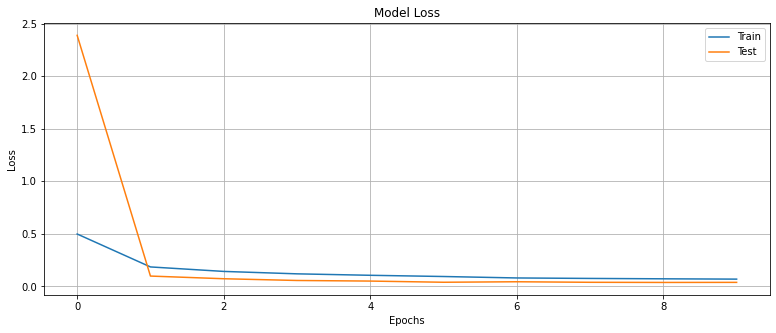

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.grid()
plt.show()

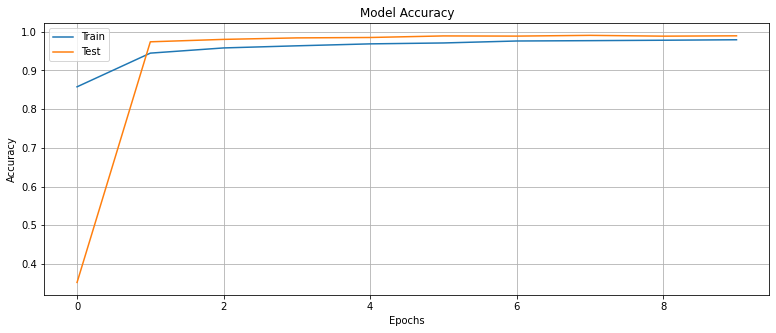

In [70]:
plt.figure(figsize=(13, 5))
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.grid()
plt.show()

In [73]:
pred_digits_test = np.argmax(model.predict(d_test),axis=1)
image_id_test = []

for i in range (len(pred_digits_test)):
    image_id_test.append(i+1)
    
d = {'ImageId':image_id_test,'Label':pred_digits_test}
submission = pd.DataFrame(d)

submission.to_csv('submission.csv',index=False)

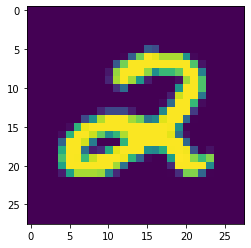

In [82]:
plt.imshow(d_test[27999].reshape(28,28))